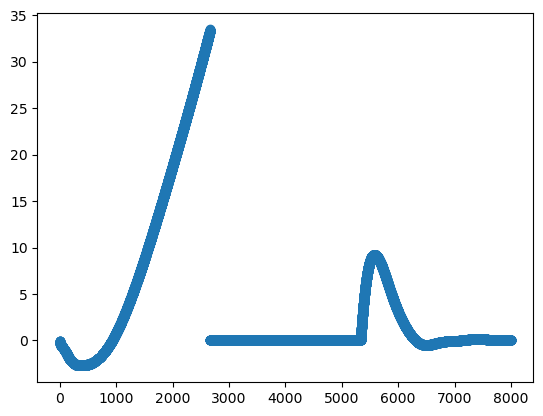

In [4]:
import matplotlib.pyplot as plt

import numpy as np

data = np.loadtxt('Al03.eam.alloy',skiprows=8)
r = np.linspace(0,8000,29998)

plt.scatter(r,data)
plt.show()

In [48]:
from lammps import lammps
lmp = lammps(cmdargs=["-sc", "log"])

cmd_0 = f'''
dimension 3
units metal
atom_style atomic
boundary p p p
lattice fcc 4.046
region box block 0 8.092 0 8.092 0 8.092
create_box 1 box
create_atoms 1 box
mass 1 26.9815
write_data crystalline_initial.inp
'''

lmp.commands_string(cmd_0)
lmp.close()

In [24]:
import numpy as np

### Fcc

In [25]:
lattice_parameter_fcc = 4.046
mass_fcc_1 = 26.9815

In [26]:
basis_fcc = np.array([[1.0, 0.0, 0.0],[0.0,1.0,0.0],[0.0,0.0,1.0]])*lattice_parameter_fcc

In [27]:
print(basis_fcc)

[[4.046 0.    0.   ]
 [0.    4.046 0.   ]
 [0.    0.    4.046]]


In [28]:
basis_atoms_fcc = np.array([[0.0,0.0,0.0],[0.5,0.5,0.0],[0.5,0.0,0.5],[0.0,0.5,0.5]])*lattice_parameter_fcc

In [29]:
print(basis_atoms_fcc)

[[0.    0.    0.   ]
 [2.023 2.023 0.   ]
 [2.023 0.    2.023]
 [0.    2.023 2.023]]


In [30]:
system_size = 8

In [31]:
positions_fcc = []

for i in range(system_size):
    for j in range(system_size):
        for k in range(system_size):
            base_position_fcc = np.array([i,j,k])
            cart_position_fcc = np.inner(basis_fcc.T, base_position_fcc)
            for atom in basis_atoms_fcc:    
                positions_fcc.append(cart_position_fcc + atom)

In [32]:
with open('structures/crystalline_fcc.inp', 'w') as fdata:
        fdata.write('Start File for LAMMPS\n')
        fdata.write('{} atoms\n'.format(len(positions_fcc)))
        #fdata.write('{} atoms\n'.format(natoms))
        fdata.write('{} atom types\n'.format(1))
        fdata.write('\n')
        fdata.write('{} {} xlo xhi\n'.format(0.0, system_size*lattice_parameter_fcc))
        fdata.write('{} {} ylo yhi\n'.format(0.0, system_size*lattice_parameter_fcc))
        fdata.write('{} {} zlo zhi\n'.format(0.0, system_size*lattice_parameter_fcc))
        fdata.write('\n')
        fdata.write('Masses\n')
        fdata.write('\n')
        fdata.write('{} {} \n'.format(1,mass_fcc_1))
        fdata.write('\n')
        fdata.write('Atoms\n\n')
        for i,pos in enumerate(positions_fcc):
            fdata.write('{} 1 {} {} {}\n'.format(i+1,*pos))

### BCC

In [33]:
lattice_parameter_bcc = 3.31
mass_bcc_1 = 47.68

In [34]:
system_size = 8

In [35]:
basis_bcc = np.array([[1.0, 0.0, 0.0],[0.0,1.0,0.0],[0.0,0.0,1.0]])*lattice_parameter_bcc

In [36]:
print(basis_bcc)

[[3.31 0.   0.  ]
 [0.   3.31 0.  ]
 [0.   0.   3.31]]


In [37]:
basis_atoms_bcc = np.array([[0,0,0],[0.5,0.5,0.5]])*lattice_parameter_bcc

In [38]:
print(basis_atoms_bcc)

[[0.    0.    0.   ]
 [1.655 1.655 1.655]]


In [39]:
positions_bcc = []

for i in range(system_size):
    for j in range(system_size):
        for k in range(system_size):
            base_position_bcc = np.array([i,j,k])
            cart_position_bcc = np.inner(basis_bcc.T, base_position_bcc)
            for atom in basis_atoms_bcc:    
                positions_bcc.append(cart_position_bcc + atom)

In [40]:
with open('structures/crystalline_bcc.inp', 'w') as fdata:
        fdata.write('Start File for LAMMPS\n')
        fdata.write('{} atoms\n'.format(len(positions_bcc)))
        #fdata.write('{} atoms\n'.format(natoms))
        fdata.write('{} atom types\n'.format(1))
        fdata.write('\n')
        fdata.write('{} {} xlo xhi\n'.format(0.0, system_size*lattice_parameter_bcc))
        fdata.write('{} {} ylo yhi\n'.format(0.0, system_size*lattice_parameter_bcc))
        fdata.write('{} {} zlo zhi\n'.format(0.0, system_size*lattice_parameter_bcc))
        fdata.write('\n')
        fdata.write('Masses\n')
        fdata.write('\n')
        fdata.write('{} {} \n'.format(1,mass_bcc_1))
        fdata.write('\n')
        fdata.write('Atoms\n\n')
        for i,pos in enumerate(positions_bcc):
            fdata.write('{} 1 {} {} {}\n'.format(i+1,*pos))

### HCP

I now want to create a hcp crystal structure. My idea is set two points in two different planes. To do this I have two arrays: base_position_hcp_1 = np.array([[0,0,0],[1.475,2.55477,0]]) and base_position_hcp_2 = np.array([[-1.475,0.8516,lattice_parameter_hcp_c/2],[0,-1.70318,lattice_parameter_hcp_c/2]]). These planes should be stacked on top of one another, separated by a distance of lattice_parameter_hcp_c/2. Meaning that two same planes would have the double distance. In the planes, the points are separated by the lattice_parameter_hcp_ab. Once along the x direction and also rotated by 120 degrees. How can I create ten planes of each type. Perhaps by creating an array for each plane type first and then appending, since the position in the array should not matter.

https://www.physics-in-a-nutshell.com/article/11/close-packed-structures-fcc-and-hcp

In [41]:
lattice_parameter_hcp_ab = 2.95
lattice_parameter_hcp_c = 4.686
mass_hcp_1 = 47.867
system_size = 6

In [42]:
basis_hcp = np.array([[lattice_parameter_hcp_ab,0,0],[0,0.8602*lattice_parameter_hcp_ab,0],[0,0,lattice_parameter_hcp_c]])

In [43]:
basis_atoms_hcp = np.array([[0,0,0],[2/3*lattice_parameter_hcp_ab,1/3*lattice_parameter_hcp_ab,1/2*lattice_parameter_hcp_c]])

In [44]:
positions_hcp = []

for i in range(system_size):
    for j in range(system_size):
        for k in range(system_size):
            base_position_hcp = np.array([i,j,k])
            cart_position_hcp = np.inner(basis_hcp.T, base_position_hcp)
            for atom in basis_atoms_hcp:    
                positions_hcp.append(cart_position_hcp + atom)

In [45]:
with open('structures/crystalline_hcp.inp', 'w') as fdata:
        fdata.write('Start File for LAMMPS\n')
        fdata.write('{} atoms\n'.format(len(positions_hcp)))
        #fdata.write('{} atoms\n'.format(natoms))
        fdata.write('{} atom types\n'.format(1))
        fdata.write('\n')
        fdata.write('{} {} xlo xhi\n'.format(0.0, system_size*lattice_parameter_hcp_ab))
        fdata.write('{} {} ylo yhi\n'.format(0.0, system_size*lattice_parameter_hcp_ab))
        fdata.write('{} {} zlo zhi\n'.format(0.0, system_size*lattice_parameter_hcp_c))
        fdata.write('\n')
        fdata.write('Masses\n')
        fdata.write('\n')
        fdata.write('{} {} \n'.format(1,mass_hcp_1))
        fdata.write('\n')
        fdata.write('Atoms\n\n')
        for i,pos in enumerate(positions_hcp):
            fdata.write('{} 1 {} {} {}\n'.format(i+1,*pos))

In [46]:
aLat = 3.31
with open(f'structures/hcp_Ti.inp', 'w+') as fw:
    fw.write(f"""Start File for LAMMPS
2 atoms
1 atom types

0.0 {1.00*aLat} xlo xhi
0.0 {0.866025*aLat} ylo yhi
0.0 {1.588*aLat} zlo zhi
{0.5*aLat} 0E-15 0E-15 xy xz yz

Masses

1 47.867000

Atoms

1 1 0.000000000000000 0.000000000000000 0.000000000000000
2 1 0.000000000000000 {0.577350269189626*aLat} {0.794000000000000*aLat}      
    """)

### Polymers